<div style="text-align: right"> در این قسمت پکیج هایی که با آنها در ادامه کار خواهیم کرد را اضافه خواهیم کرد
</div>


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.read_csv('diabetes.csv')

<div style="text-align: right"> در این قسمت داده های پوچ را شناسایی می کنیم و در مراحل بعدی در مورد آنها تصمیم اتخاذ می کنیم
</div>


In [2]:
df.isna().sum()

Unnamed: 0                   0
Diabetes_binary              0
HighBP                       0
High Cholesterol             0
Cholesterol Check            0
BMI                          1
Smoker                       0
Stroke                       0
HeartDiseaseorAttack         1
Physical Activity            1
Fruits                       2
Veggies                      1
Heavy Alcohol Consumption    1
Any Health Care              2
No Doctor because of Cost    2
General Health               1
Mental Health                1
Physical Health              1
Difficulty Walking           2
Sex                          1
Age                          1
Education                    1
Income                       1
dtype: int64

In [3]:
df["Income"].value_counts()

Cat8       20645
Cat7       11425
Cat6       10287
Cat5        8010
Cat4        6658
Cat3        5556
Cat2        4498
Cat1        3611
Unknown        1
Name: Income, dtype: int64

<div style="text-align: right"> 
در این قسمت به تصمیم گیری راجع به داده های پوچ پرداختیم و در آن ستون های سلامت روان، سلامت فیزیکی و شاخص توده که میتوانستند با استفاده از میانگین جایگزین شوند را جایگذاری کردیم 
 </div>
<div style="text-align: right"> در ادامه ستون هایی که دارای مقدار باینری بودن را با مقدار یکی از داده های ستون ها جایگزین  کردیم 
</div>
<div style="text-align: right"> داده هایی نیز که به صورت کیفی و کتگوریگال بودند را با برچسب گمشده مشخص کردیم
</div>
<div style="text-align: right">همچنین در ستون درامد که داده ای با مقدار نا شناخته داشتیم نیز آن را به مقدار گمشده تغییر دادیم
</div>






In [4]:
df['BMI'].fillna(df['BMI'].mean(), inplace=True)
df["Mental Health"].fillna(df["Mental Health"].mean(), inplace=True)
df["Physical Health"].fillna(df["Physical Health"].mean(), inplace=True)
df["Education"].fillna("missed", inplace=True)
df["Income"].fillna("missed", inplace=True)
df["Income"].replace({"Unknown": "missed"}, inplace=True)
df["HeartDiseaseorAttack"].fillna(0, inplace=True)
df["Physical Activity"].fillna(0, inplace=True)
df["Fruits"].fillna(0, inplace=True)
df["Veggies"].fillna(0, inplace=True)
df["Heavy Alcohol Consumption"].fillna(0, inplace=True)
df["Any Health Care"].fillna(0, inplace=True)
df["No Doctor because of Cost"].fillna(0, inplace=True)
df["General Health"].fillna("missed", inplace=True)
df["Difficulty Walking"].fillna(0, inplace=True)
df["Sex"].fillna("male", inplace=True)
df["Age"].fillna(df["Age"].mean(), inplace=True)


<div style="text-align: right"> حذف فواصل موجود در نامگذاری ستون ها  و حذف کردن ستون بدون نام
</div>


In [5]:
df=df.rename(columns={"High Cholesterol": "High_Cholesterol", "Cholesterol Check": "Cholesterol_Check",
 "Physical Activity": "Physical_Activity", "Heavy Alcohol Consumption": "Heavy_Alcohol_Consumption",
  "Any Health Care": "Any_Health_Care", "No Doctor because of Cost": "No_Doctor_because_of_Cost",
  "General Health": "General_Health","Mental Health": "Mental_Health", "Physical Health": "Physical_Health",
   "Difficulty Walking": "Difficulty_Walking"})
df.drop("Unnamed: 0",axis=1,inplace=True)
df

,Diabetes_binary,HighBP,High_Cholesterol,Cholesterol_Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical_Activity,Fruits,...,Any_Health_Care,No_Doctor_because_of_Cost,General_Health,Mental_Health,Physical_Health,Difficulty_Walking,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,Medium,5.0,30.0,0.0,male,4.0,Cat6,Cat8
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,Medium,0.0,0.0,0.0,male,12.0,Cat6,Cat8
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,High,0.0,10.0,0.0,male,13.0,Cat6,Cat8
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Medium,0.0,3.0,0.0,male,11.0,Cat6,Cat8
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Good,0.0,0.0,0.0,female,8.0,Cat5,Cat8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.0,0.0,0.0,female,6.0,Cat4,Cat1
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Good,0.0,0.0,1.0,male,10.0,Cat3,Cat6
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Very Low,15.0,0.0,1.0,female,13.0,Cat6,Cat4
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.0,0.0,1.0,female,11.0,Cat2,Cat4


In [6]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'High_Cholesterol', 'Cholesterol_Check',
       'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'Physical_Activity',
       'Fruits', 'Veggies', 'Heavy_Alcohol_Consumption', 'Any_Health_Care',
       'No_Doctor_because_of_Cost', 'General_Health', 'Mental_Health',
       'Physical_Health', 'Difficulty_Walking', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

<div style="text-align: right"> نرمال سازی در این قسمت با استفاده از روش مین-ماکس انجام  گرفته شده است. و بر متغیر هایی که در بازه هایی بزرگ تر هستند آن را اجرا کردیم
</div>


In [7]:
df["BMI"] = (df["BMI"]-df["BMI"].min()) / (df["BMI"].max()-df["BMI"].min())
df["Mental_Health"] = (df["Mental_Health"]-df["Mental_Health"].min()) / (df["Mental_Health"].max()-df["Mental_Health"].min())
df["Physical_Health"] = (df["Physical_Health"]-df["Physical_Health"].min()) / (df["Physical_Health"].max()-df["Physical_Health"].min())
df["Age"] = (df["Age"]-df["Age"].min()) / (df["Age"].max()-df["Age"].min())
df

,Diabetes_binary,HighBP,High_Cholesterol,Cholesterol_Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical_Activity,Fruits,...,Any_Health_Care,No_Doctor_because_of_Cost,General_Health,Mental_Health,Physical_Health,Difficulty_Walking,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,Medium,0.166667,1.000000,0.0,male,0.250000,Cat6,Cat8
1,0.0,1.0,1.0,1.0,0.162791,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,Medium,0.000000,0.000000,0.0,male,0.916667,Cat6,Cat8
2,0.0,0.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,High,0.000000,0.333333,0.0,male,1.000000,Cat6,Cat8
3,0.0,1.0,1.0,1.0,0.186047,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Medium,0.000000,0.100000,0.0,male,0.833333,Cat6,Cat8
4,0.0,0.0,0.0,1.0,0.197674,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Good,0.000000,0.000000,0.0,female,0.583333,Cat5,Cat8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,0.290698,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.000000,0.000000,0.0,female,0.416667,Cat4,Cat1
70688,1.0,0.0,1.0,1.0,0.197674,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Good,0.000000,0.000000,1.0,male,0.750000,Cat3,Cat6
70689,1.0,1.0,1.0,1.0,0.151163,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Very Low,0.500000,0.000000,1.0,female,1.000000,Cat6,Cat4
70690,1.0,1.0,1.0,1.0,0.069767,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.000000,0.000000,1.0,female,0.833333,Cat2,Cat4


In [8]:
df

,Diabetes_binary,HighBP,High_Cholesterol,Cholesterol_Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical_Activity,Fruits,...,Any_Health_Care,No_Doctor_because_of_Cost,General_Health,Mental_Health,Physical_Health,Difficulty_Walking,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,Medium,0.166667,1.000000,0.0,male,0.250000,Cat6,Cat8
1,0.0,1.0,1.0,1.0,0.162791,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,Medium,0.000000,0.000000,0.0,male,0.916667,Cat6,Cat8
2,0.0,0.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,High,0.000000,0.333333,0.0,male,1.000000,Cat6,Cat8
3,0.0,1.0,1.0,1.0,0.186047,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Medium,0.000000,0.100000,0.0,male,0.833333,Cat6,Cat8
4,0.0,0.0,0.0,1.0,0.197674,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Good,0.000000,0.000000,0.0,female,0.583333,Cat5,Cat8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,0.290698,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.000000,0.000000,0.0,female,0.416667,Cat4,Cat1
70688,1.0,0.0,1.0,1.0,0.197674,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Good,0.000000,0.000000,1.0,male,0.750000,Cat3,Cat6
70689,1.0,1.0,1.0,1.0,0.151163,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Very Low,0.500000,0.000000,1.0,female,1.000000,Cat6,Cat4
70690,1.0,1.0,1.0,1.0,0.069767,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.000000,0.000000,1.0,female,0.833333,Cat2,Cat4


<div style="text-align: right"> با استفاده از دامی ها در این قسمت متغیر های کتگوریکال را به صورتی تغییر میدهیم تا بتوان بر روی آنها پردازش انجام داد و به ویژگی عددی تبدیلشان می کنیم </div>


In [39]:
# Getting Dummies from all other categorical vars
for col in df.dtypes[df.dtypes == 'object'].index:
   for_dummy = df.pop(col)
   df = pd.concat([df, pd.get_dummies(for_dummy, prefix=col)], axis=1)

df

,Diabetes_binary,HighBP,High_Cholesterol,Cholesterol_Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical_Activity,Fruits,...,Education_missed,Income_Cat1,Income_Cat2,Income_Cat3,Income_Cat4,Income_Cat5,Income_Cat6,Income_Cat7,Income_Cat8,Income_missed
0,0.0,1.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,0.0,1.0,1.0,1.0,0.162791,1.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
2,0.0,0.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0
3,0.0,1.0,1.0,1.0,0.186047,1.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0
4,0.0,0.0,0.0,1.0,0.197674,1.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,0.290698,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
70688,1.0,0.0,1.0,1.0,0.197674,1.0,0.0,1.0,0.0,1.0,...,0,0,0,0,0,0,1,0,0,0
70689,1.0,1.0,1.0,1.0,0.151163,0.0,0.0,1.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,0
70690,1.0,1.0,1.0,1.0,0.069767,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0


<div style="text-align: right"> را به عنوان برچسب جدا کرده و باقی به جز این ستون را به عنوان مجموعه داده جدا میکنیم و در ادامه با نسبت ۸۰ به ۲۰ داده های آموزش و تست را جدا می کنیم binary_Diabetes برچسب ها را با مجموعه داده جدا می کنیم . به این صورت که  </div>


In [40]:
from sklearn.model_selection import train_test_split

X = df.drop("Diabetes_binary", axis=1)
y = df["Diabetes_binary"]
# np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((56553, 41), (14139, 41), (56553,), (14139,))

<div style="text-align: right">  تعریف می کنیم و بر اساس آن چه که در دستورکار گفته شده است پارامتر ها را مقدار می دهیم  XGBoost Classifier یک  </div>


In [11]:
from xgboost import XGBClassifier

# fit model no training data
model = XGBClassifier(learning_rate=0.1, max_depth=4, n_estimators=200, subsample=0.5, colsample_bytree=1, random_seed=123, eval_metric='auc', verbosity=1)


model.fit(X_train, y_train, 
          early_stopping_rounds=10, 
          eval_set=[(X_test, y_test)], 
          verbose=True)



C:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16:29:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "random_seed" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.77743
[1]	validation_0-auc:0.79735
[2]	validation_0-auc:0.80011
[3]	validation_0-auc:0.80484
[4]	validation_0-auc:0.80851
[5]	validation_0-auc:0.81055
[6]	validation_0-auc:0.81144
[7]	validation_0-auc:0.81297
[8]	validation_0-auc:0.81361
[9]	validation_0-auc:0.81467
[10]	validation_0-auc:0.81659
[11]	validation_0-auc:0.81783
[12]	validation_0-auc:0.81862
[13]	validation_0-auc:0.81983
[14]	validation_0-auc:0.82036
[15]	validation_0-auc:0.82088
[16]	validation_0-auc:0.82170
[17]	validation_0-auc:0.82204
[18]	validation_0-auc:0.82254
[19]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_seed=123,
              random_state=0, reg_alpha=0, ...)

<div style="text-align: right"> را محاسبه می کنیم precision و recall در این قسمت بر اساس داده های تست جداشده در قسمت قبل دقت مدل را محاسبه کرده و     </div>


In [12]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74      7014
         1.0       0.74      0.79      0.76      7125

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



In [13]:
model.score(X_test, y_test)

0.7524577410000707

<div style="text-align: right"> در این قسمت نیز ماتریس در هم ریختگی محاسبه شده است.     </div>


In [14]:
from sklearn.metrics import confusion_matrix
y_true= y_test
cf_matrix=confusion_matrix(y_true,y_pred)
cf_matrix


array([[5008, 2006],
       [1494, 5631]], dtype=int64)



<div style="text-align: right"> در این قسمت مدل را بر روی ترکیبهای متفاوت از پارامترها تست کرده و
بهترین مدل را خروجی می دهیم     </div>


In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

model = XGBClassifier()
learning_rate = [0.02,0.05,0.1,0.3]
max_depth =[2,3,4]
n_estimators =[100,200,300]
colsample_bytree = [0.8,1]

params = dict(learning_rate=learning_rate, n_estimators=n_estimators, max_depth= max_depth, colsample_bytree= colsample_bytree)

def my_roc_auc_score(model, X, y): return roc_auc_score(y, model.predict_proba(X)[:,1])

grid = GridSearchCV(model,param_grid=params,scoring=my_roc_auc_score,cv=3)

grid.fit(X_train, y_train) 
grid.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.05,
 'max_depth': 4,
 'n_estimators': 200}

<div style="text-align: right"> امتیاز مدل را مشاهده می کنیم
</div>


In [19]:
grid.best_score_

0.8300432354715378

In [20]:
grid.best_estimator_.score(X_test, y_test)

0.7535893627554989


<div style="text-align: right">را محاسبه می کنیم precision و recall
 </div>

In [21]:
grid_pred = grid.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.72      0.74      7014
         1.0       0.74      0.79      0.76      7125

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



<div style="text-align: right"> در این قسمت نیز ماتریس در هم ریختگی محاسبه شده است.     </div>


In [22]:
y_true= y_test
cf_matrix=confusion_matrix(y_true,grid_pred)
cf_matrix


array([[5016, 1998],
       [1486, 5639]], dtype=int64)



<div style="text-align: right"> تغییرات مدل بر اساس چهار پارامتر گفته شده در قسمت قبل به صورت ۲ به ۲ بر روی نمودار آورده شده است.
    </div>
    
<div style="text-align: right">
پارامتر ها در این قسمت به صورت زیر می باشند
</div>
learning_rate = [0.02,0.05,0.1,0.3]
n_estimators =[100,200,300]


Text(0, 0.5, 'Score')

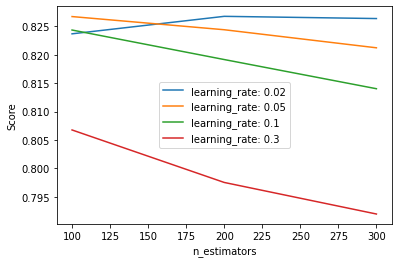

In [35]:
learning_rate = [0.02,0.05,0.1,0.3]
n_estimators =[100,200,300]

param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)
grid_search = GridSearchCV(XGBClassifier(), param_grid, scoring=my_roc_auc_score, cv=3)
grid_result = grid_search.fit(X_test, y_test)
means = grid_result.cv_results_['mean_test_score']
scores = np.array(means).reshape(len(learning_rate), len(n_estimators))
for i, value in enumerate(learning_rate):
    plt.plot(n_estimators, scores[i], label='learning_rate: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Score')

<div style="text-align: right">
پارامتر ها در این قسمت به صورت زیر می باشند
</div>
learning_rate = [0.02,0.05,0.1,0.3]
max_depth =[2,3,4]

Text(0, 0.5, 'Score')

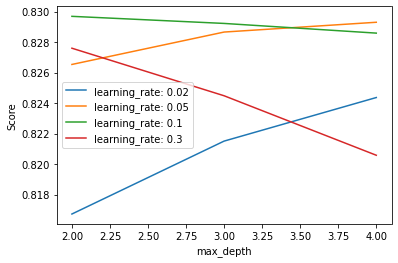

In [33]:
learning_rate = [0.02,0.05,0.1,0.3]
max_depth =[2,3,4]

param_grid = dict(learning_rate=learning_rate, max_depth=max_depth)
grid_search = GridSearchCV(XGBClassifier(), param_grid, scoring=my_roc_auc_score, cv=3)
grid_result = grid_search.fit(X_test, y_test)
means = grid_result.cv_results_['mean_test_score']
scores = np.array(means).reshape(len(learning_rate), len(max_depth))
for i, value in enumerate(learning_rate):
    plt.plot(max_depth, scores[i], label='learning_rate: ' + str(value))
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('Score')

<div style="text-align: right">
پارامتر ها در این قسمت به صورت زیر می باشند
</div>
learning_rate = [0.02,0.05,0.1,0.3]
colsample_bytree = [0.8,1]


Text(0, 0.5, 'Score')

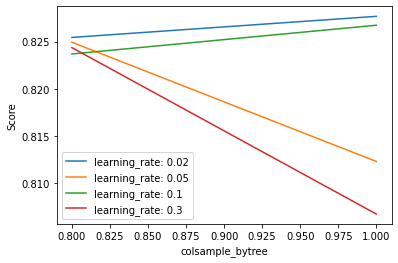

In [34]:
learning_rate = [0.02,0.05,0.1,0.3]
colsample_bytree = [0.8,1]

param_grid = dict(learning_rate=learning_rate, colsample_bytree=colsample_bytree)
grid_search = GridSearchCV(XGBClassifier(), param_grid, scoring=my_roc_auc_score, cv=3)
grid_result = grid_search.fit(X_test, y_test)
means = grid_result.cv_results_['mean_test_score']
scores = np.array(means).reshape(len(learning_rate), len(colsample_bytree))
for i, value in enumerate(learning_rate):
    plt.plot(colsample_bytree, scores[i], label='learning_rate: ' + str(value))
plt.legend()
plt.xlabel('colsample_bytree')
plt.ylabel('Score')

<div style="text-align: right">
پارامتر ها در این قسمت به صورت زیر می باشند
</div>
max_depth =[2,3,4]
n_estimators =[100,200,300]


Text(0, 0.5, 'Score')

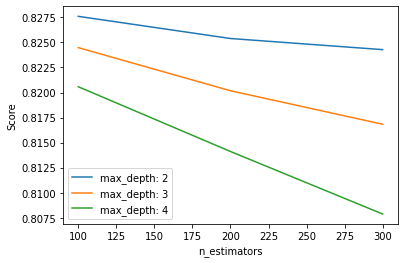

In [36]:
max_depth =[2,3,4]
n_estimators =[100,200,300]

param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
grid_search = GridSearchCV(XGBClassifier(), param_grid, scoring=my_roc_auc_score, cv=3)
grid_result = grid_search.fit(X_test, y_test)
means = grid_result.cv_results_['mean_test_score']
scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='max_depth: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Score')

<div style="text-align: right">
پارامتر ها در این قسمت به صورت زیر می باشند
</div>
max_depth =[2,3,4]
colsample_bytree = [0.8,1]


Text(0, 0.5, 'Score')

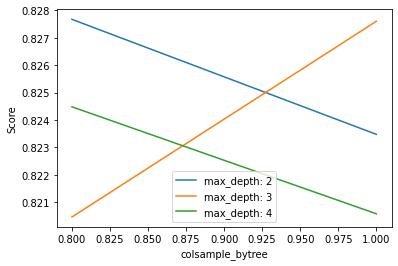

In [37]:
max_depth =[2,3,4]
colsample_bytree = [0.8,1]

param_grid = dict(max_depth=max_depth, colsample_bytree=colsample_bytree)
grid_search = GridSearchCV(XGBClassifier(), param_grid, scoring=my_roc_auc_score, cv=3)
grid_result = grid_search.fit(X_test, y_test)
means = grid_result.cv_results_['mean_test_score']
scores = np.array(means).reshape(len(max_depth), len(colsample_bytree))
for i, value in enumerate(max_depth):
    plt.plot(colsample_bytree, scores[i], label='max_depth: ' + str(value))
plt.legend()
plt.xlabel('colsample_bytree')
plt.ylabel('Score')

<div style="text-align: right">
پارامتر ها در این قسمت به صورت زیر می باشند
</div>
n_estimators =[100,200,300]
colsample_bytree = [0.8,1]


Text(0, 0.5, 'Score')

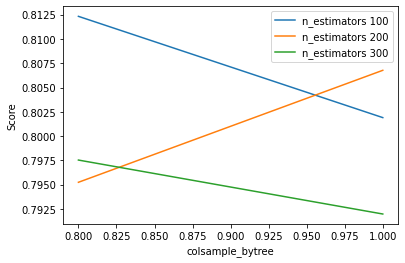

In [38]:
n_estimators =[100,200,300]
colsample_bytree = [0.8,1]

param_grid = dict(n_estimators=n_estimators, colsample_bytree=colsample_bytree)
grid_search = GridSearchCV(XGBClassifier(), param_grid, scoring=my_roc_auc_score, cv=3)
grid_result = grid_search.fit(X_test, y_test)
means = grid_result.cv_results_['mean_test_score']
scores = np.array(means).reshape(len(n_estimators), len(colsample_bytree))
for i, value in enumerate(n_estimators):
    plt.plot(colsample_bytree, scores[i], label='n_estimators ' + str(value))
plt.legend()
plt.xlabel('colsample_bytree')
plt.ylabel('Score')